# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("/scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/lfw/lfw/*/*"))
dog_files = np.array(glob("/scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/dogImages/dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


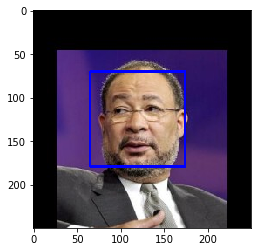

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 

Percentage of first 100 iamges in human_files detected as human faces:  99.0 <br/>
Percentage of first 100 iamges in dog_files detected as human faces:  18.0

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_percent = (sum([face_detector(x) for x in human_files_short])/len(human_files_short))*100
dog_percent = (sum([face_detector(x) for x in dog_files_short])/len(dog_files_short))*100

print('Percentage of first 100 iamges in human_files detected as human faces: ', human_percent)
print('Percentage of first 100 iamges in dog_files detected as human faces: ', dog_percent)

Percentage of first 100 iamges in human_files detected as human faces:  99.0
Percentage of first 100 iamges in dog_files detected as human faces:  18.0


We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [5]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [8]:
torch.cuda.device_count()

2

In [9]:
use_multiple = torch.cuda.device_count()>0

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [10]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


means = [0.485, 0.456, 0.406]
stds = [0.229, 0.224, 0.225]
device = torch.device('cuda' if use_cuda else 'cpu')
print(device)
def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    img = Image.open(img_path)
    #Using transforamtions mentioned in Pytorch pretrained example in prediction mode, we set following preprocessing step:
    transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(size=224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=means,
                                                         std=stds)])
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    
    img = transform(img)
    img_ = img.unsqueeze(0)
    img_ = img_.to(device)
    VGG16.eval()
    pred = VGG16(img_)
    
    pred_idx = np.argmax(pred.cpu().detach().numpy())
    
    return pred_idx # predicted class index

cuda


In [11]:
pred_idx = VGG16_predict(dog_files[0])

In [12]:
pred_idx

247

### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [13]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    if(VGG16_predict(img_path) in range(151,269)):
        return True
    return False # true/false

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__  

Percentage of first 100 iamges in human_files detected as dogs:  1.0

Percentage of first 100 iamges in dog_files detected as dogs:  97.0


In [14]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.

human_percent = (sum([dog_detector(x) for x in human_files_short])/len(human_files_short))*100
dog_percent = (sum([dog_detector(x) for x in dog_files_short])/len(dog_files_short))*100

print('Percentage of first 100 iamges in human_files detected as dogs: ', human_percent)
print('Percentage of first 100 iamges in dog_files detected as dogs: ', dog_percent)

Percentage of first 100 iamges in human_files detected as dogs:  0.0
Percentage of first 100 iamges in dog_files detected as dogs:  97.0


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [15]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [16]:
# #Calculate sizes of images in train data

# train_file = '/scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/dogImages/dogImages/train/'
# shapes = []
# for file in dog_files:
#     img = cv2.imread(file)
#     shapes.append(img.shape[0])

In [17]:
# print('Mean width: ',np.mean(shapes))
# print('Min width: ',np.min(shapes))
# print('Max width: ',np.max(shapes))

In [18]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transform = transforms.Compose([transforms.Resize(256),
                                     transforms.RandomSizedCrop(224),
                                     transforms.RandomHorizontalFlip(),
                                     transforms.RandomRotation(10),
#                                      transforms.ColorJitter(brightness=0.1, contrast=0.15, saturation=0.1, hue=0.1),
                                     transforms.ToTensor(),
                                     transforms.Normalize(means, stds)]
                                     )

test_valid_transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(size=224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=means,std=stds)])

train_data = datasets.ImageFolder('/scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/dogImages/dogImages/train/', train_transform)
valid_data = datasets.ImageFolder('/scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/dogImages/dogImages/valid/', test_valid_transform)
test_data = datasets.ImageFolder('/scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/dogImages/dogImages/test/', test_valid_transform)


num_workers = 0
batch_size = 24

train_loader = torch.utils.data.DataLoader(train_data, batch_size= batch_size, shuffle = True)
valid_loader = torch.utils.data.DataLoader(valid_data, batch_size= batch_size, shuffle = True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size= batch_size, shuffle = True)



/home/prathyuakundi/miniconda3/envs/tenv/lib/python3.7/site-packages/torchvision/transforms/transforms.py:703: UserWarning: The use of the transforms.RandomSizedCrop transform is deprecated, please use transforms.RandomResizedCrop instead.
  warnings.warn("The use of the transforms.RandomSizedCrop transform is deprecated, " +


In [19]:
print('Train dataset size: ', len(train_data))
print('Validation dataset size: ', len(valid_data))
print('Test dataset size: ', len(test_data))
num_classes = len(train_data.classes)
print('Total classes: ', len(train_data.classes))

Train dataset size:  6680
Validation dataset size:  835
Test dataset size:  836
Total classes:  133


**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:

* The Images are resized by 256 and then randomly cropped to 224x224 for training data and center_cropped to 224x244 for test and validation data. The resolution of training images ranges from 113x113 to 4000x4000 with mean width approx 529. But choosing 529 will be a bottle neck to gpu memory. Hence I resorted to input size recommended for VGG which is 224x224x3

* The dataset is augmented with random horizontal flips, random crops, random rotations by 15 degrees and then finally all the images are normalized to means and standard deviations that are used for VGG

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [20]:
import torch.nn as nn
import torch.nn.functional as F


def conv(in_channels, out_channels, kernel_size, stride=1, padding=1, batch_norm=True):
    """Creates a convolutional layer, with optional batch normalization.
    """
    layers = []
    conv_layer = nn.Conv2d(in_channels, out_channels, 
                           kernel_size, stride, padding, bias=False)
    
    # append conv layer
    layers.append(conv_layer)

    if batch_norm:
        # append batchnorm layer
        layers.append(nn.BatchNorm2d(out_channels))
     
    # using Sequential container
    return nn.Sequential(*layers)



# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self, num_classes, conv_dim = 32):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.conv_dim = conv_dim
        # No batch normalization for first conv layer
        self.conv1 = conv(3, conv_dim,3, batch_norm=False) 
        self.conv2 = conv(conv_dim, conv_dim, 3)
        
        self.conv3 = conv(conv_dim, conv_dim*2, 3)
        self.conv4 = conv(conv_dim*2, conv_dim*2, 3)
        
        self.conv5 = conv(conv_dim*2, conv_dim*4, 3)
        self.conv6 = conv(conv_dim*4, conv_dim*4, 3)
        self.conv7 = conv(conv_dim*4, conv_dim*4, 3)
        
        self.conv8 = conv(conv_dim*4, conv_dim*8, 3)
        self.conv9 = conv(conv_dim*8, conv_dim*8, 3)
        self.conv10 = conv(conv_dim*8, conv_dim*8, 3)
        
        self.pool = nn.MaxPool2d(2,2) # 256*14*14
        
        self.fc1 = nn.Linear(256*14*14, 1024) # 
        self.fc2 = nn.Linear(1024, 512)
        self.fc_out = nn.Linear(512, num_classes)
        
        self.dropout = nn.Dropout(0.2)
        
        
    
    def forward(self, x):
        ## Define forward behavior
        
        x = F.relu(self.conv1(x)) #Out: (64, 224, 224)
        x = F.relu(self.conv2(x)) #Out: (64, 224, 224)
        
        x = self.pool(x)  # Out:(64, 112, 112)
        
        x = F.relu(self.conv3(x)) # Out: (128, 112, 112)
        x = F.relu(self.conv4(x)) # Out: (128, 112, 112)
        
        x = self.pool(x) # Out: (128, 56, 56)
        
        x = F.relu(self.conv5(x)) # Out: (256, 56, 56)
        x = F.relu(self.conv6(x)) # Out: (256, 56, 56)
        x = F.relu(self.conv7(x)) # Out: (256, 56, 56)
        
        x = self.pool(x) # Out: (256, 28, 28)
        
        x = F.relu(self.conv8(x)) # Out: (512, 28, 28)
        x = F.relu(self.conv9(x)) # Out: (512, 28, 28)
        x = F.relu(self.conv10(x)) # Out: (512, 28, 28)
        
        x = self.pool(x) # Out: (512, 14, 14)
#         print(x.size())
        x = x.view(-1, x.size(1)*x.size(2)*x.size(3)) # Out: (, 100352)
        x = self.dropout(x) # Out: (, 100352)
        
        x = self.fc1(x) # Out: (, 1024)
        x = self.fc2(x) # Out: (, 512)
        
        x = self.fc_out(x) # Out: (, 133)
        
        
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net(num_classes)

# move tensors to GPU if CUDA is available
if use_multiple:
#     model_scratch.cuda()
    model_scratch = nn.DataParallel(model_scratch)
model_scratch = model_scratch.cuda()

In [21]:
from torchsummary import summary

In [22]:
print(summary(model_scratch, (3,224,224)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 224, 224]             864
            Conv2d-2         [-1, 32, 224, 224]           9,216
       BatchNorm2d-3         [-1, 32, 224, 224]              64
         MaxPool2d-4         [-1, 32, 112, 112]               0
            Conv2d-5         [-1, 64, 112, 112]          18,432
       BatchNorm2d-6         [-1, 64, 112, 112]             128
            Conv2d-7         [-1, 64, 112, 112]          36,864
       BatchNorm2d-8         [-1, 64, 112, 112]             128
         MaxPool2d-9           [-1, 64, 56, 56]               0
           Conv2d-10          [-1, 128, 56, 56]          73,728
      BatchNorm2d-11          [-1, 128, 56, 56]             256
           Conv2d-12          [-1, 128, 56, 56]         147,456
      BatchNorm2d-13          [-1, 128, 56, 56]             256
           Conv2d-14          [-1, 128,

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

* The architecture of the model is similar to that of VGG, but less deep. There are a total of 10 convolution layers, 4 max pooling layers and 3 dense layers. 
* The input to the network is a (3, 224, 224) image that goes through a stack of convolution layers with receptive field of 3 and stride and padding equal to 1.
* Max pooling layers are inserted after few convolution layers. Max pooling is done with a 2x2 window size with stride = 2
* A drop out layer with 0.2 probability is then followed by three fully connected linear layers. The first layer has 1024 features, the second one has 512 and finally the third layer which is a classification layer has 133 out features equal to number of classes.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [23]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.Adam(model_scratch.parameters(),lr = 0.001) 

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [24]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
import time
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        start_time = time.time()
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            # Clear the gradients
            optimizer.zero_grad()
            # Get preditions
            pred = model.forward(data)
            #Calculate loss
            loss = criterion(pred, target)
            # Backpropagation
            loss.backward()
            # Optimizer step
            optimizer.step()
            # Update training loss
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            
            # Predictions
            pred = model.forward(data)
            
            # Loss on valid data
            loss = criterion(pred, target)
            # Update validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))
            
         
        
        # print training/validation statistics 
        print('Epoch: {} \t time: {}\tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            time.time()-start_time,
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        
        if(valid_loss < valid_loss_min):
            print('Validation loss improved from {:.6f} to {:.6f}... Saving model to {}'.format(valid_loss_min,valid_loss, save_path))
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)
        else:
            print('Validation loss not improved from {:.6f}'.format(valid_loss_min))
            
            
    # return trained model
    return model

In [25]:
import gc
gc.collect() # To prevent OOM issues

2294

In [26]:
# train the model
save_path = '/scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_scratch.pt'
loaders_scratch = {"train" : train_loader, "valid" : valid_loader, "test" : test_loader}

In [28]:
model_scratch = train(150, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, save_path)

Epoch: 1 	 time: 135.54273223876953	Training Loss: 2.711684 	Validation Loss: 2.401412
Validation loss improved from inf to 2.401412... Saving model to /scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_scratch.pt
Epoch: 2 	 time: 89.55826926231384	Training Loss: 2.687534 	Validation Loss: 2.345541
Validation loss improved from 2.401412 to 2.345541... Saving model to /scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_scratch.pt
Epoch: 3 	 time: 89.07421660423279	Training Loss: 2.662152 	Validation Loss: 2.127524
Validation loss improved from 2.345541 to 2.127524... Saving model to /scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_scratch.pt
Epoch: 4 	 time: 88.76804232597351	Training Loss: 2.681201 	Validation Loss: 2.142661
Validation loss not improved from 2.127524
Epoch: 5 	 time: 88.6234040260315	Training Loss: 2.629881 	Validation Loss: 2.062507
Validation loss improved from 2.127524 to 2.062507... Saving model to /scratch/prathyuakundi/Udacity/DL/do

Epoch: 53 	 time: 94.13127422332764	Training Loss: 2.002033 	Validation Loss: 1.696367
Validation loss not improved from 1.584106
Epoch: 54 	 time: 94.18321871757507	Training Loss: 1.974781 	Validation Loss: 1.554641
Validation loss improved from 1.584106 to 1.554641... Saving model to /scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_scratch.pt
Epoch: 55 	 time: 94.19666457176208	Training Loss: 1.976480 	Validation Loss: 1.554956
Validation loss not improved from 1.554641
Epoch: 56 	 time: 94.4677004814148	Training Loss: 2.008002 	Validation Loss: 1.726178
Validation loss not improved from 1.554641
Epoch: 57 	 time: 94.28971290588379	Training Loss: 1.971382 	Validation Loss: 1.582239
Validation loss not improved from 1.554641
Epoch: 58 	 time: 94.36997771263123	Training Loss: 1.976572 	Validation Loss: 1.594043
Validation loss not improved from 1.554641
Epoch: 59 	 time: 94.63883638381958	Training Loss: 1.986732 	Validation Loss: 1.547481
Validation loss improved from 1.554

KeyboardInterrupt: 

In [29]:
# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load(save_path))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [29]:
gc.collect()

40

In [30]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [31]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 1.443640


Test Accuracy: 60% (504/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [25]:
## TODO: Specify data loaders
loaders_transfer = loaders_scratch.copy()

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [26]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = models.resnet50(pretrained=True)


# model_transfer = model_transfer.cuda()

In [27]:
# Pre-trained layers from resnet50 are freezed
for param in model_transfer.parameters():
    param.requires_grad = False

In [28]:
model_transfer

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [29]:
# Replacing last layer with dog-breed specific layers
n_inputs = model_transfer.fc.in_features
last_layer = nn.Linear(n_inputs,num_classes)
model_transfer.fc = last_layer
if use_cuda:
#     if use_multiple:
#         model_transfer = nn.DataParallel(model_transfer)
    model_transfer = model_transfer.cuda()

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 
* For transfer learning resnet50 is chosen. It has advantage of having fewer parameters to train that VGG or AlexNet or Inception_1. Also it tackles vanshing gradient problem which is inevitable in deep networks by introducing residual connections. Hence it is one of the best feature extractors.
* A pretrained network is used and all the layers are frozen. The last layer is then replaced by a fully connected layer with 133 out_features which is equivalent to number of classes

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [30]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.fc.parameters(),2e-4) 

In [31]:
gc.collect()

100

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [32]:
# train the model
save_transfer_path = '/scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_transfer2.pt'

In [41]:
n_epochs = 10
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, save_transfer_path)



Epoch: 1 	 time: 90.63500928878784	Training Loss: 3.930410 	Validation Loss: 2.524705
Validation loss improved from inf to 2.524705... Saving model to /scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_transfer2.pt
Epoch: 2 	 time: 90.09566164016724	Training Loss: 2.541885 	Validation Loss: 1.423231
Validation loss improved from 2.524705 to 1.423231... Saving model to /scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_transfer2.pt
Epoch: 3 	 time: 90.10216927528381	Training Loss: 1.927176 	Validation Loss: 1.039999
Validation loss improved from 1.423231 to 1.039999... Saving model to /scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_transfer2.pt
Epoch: 4 	 time: 90.15825819969177	Training Loss: 1.640183 	Validation Loss: 0.860008
Validation loss improved from 1.039999 to 0.860008... Saving model to /scratch/prathyuakundi/Udacity/DL/dog_breed_classifier/model_transfer2.pt
Epoch: 5 	 time: 90.14318037033081	Training Loss: 1.430662 	Validation Loss: 0.743254

<All keys matched successfully>

In [33]:
# load the model that got the best validation accuracy (uncomment the line below)
model_transfer.load_state_dict(torch.load(save_transfer_path))

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [34]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.508912


Test Accuracy: 86% (727/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [35]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
data_transfer = {"train" : train_data, "valid" : valid_data, "test" : test_data}
class_names = [item[4:].replace("_", " ") for item in data_transfer['train'].classes]
device = torch.device('cuda' if use_cuda else 'cpu')
def predict_breed_transfer(img_path, model_transfer):
    # load the image and return the predicted breed
    img = Image.open(img_path).convert('RGB')
    test_transform = transforms.Compose([transforms.Resize(256),
                                    transforms.CenterCrop(size=224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(mean=means,std=stds)])
    
    img = test_transform(img).unsqueeze(0)
    img = img.to(device)
    model_transfer.eval()
    pred = model_transfer(img)
    pred_idx = np.argmax(pred.cpu().detach().numpy())

    
    return class_names[pred_idx]

In [36]:
def show_pred(img_path, pred_class):
    img = Image.open(img_path).convert('RGB')
    plt.imshow(img)
    plt.title(pred_class)

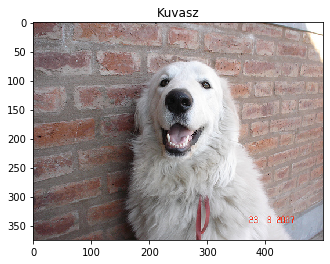

In [37]:
img_path = dog_files[10]
pred_class = predict_breed_transfer(img_path, model_transfer)
show_pred(img_path, pred_class)
    

---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [44]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    img = Image.open(img_path)
   
    
    if dog_detector(img_path):
        pred_class = predict_breed_transfer(img_path, model_transfer)
        print('Its a dog! \n And it looks like a ', pred_class)
    elif face_detector(img_path)>0:
        pred_class = predict_breed_transfer(img_path, model_transfer)
        print('Hello Human! \n If you were a dog, you would look like a ', pred_class)
    else:
        print('Please provide either human/dog images only')
        
    plt.imshow(img)
    plt.show()
        
    


---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ 

* The accuracy can be improved by introducing more than one fully connected layer at the end of the pre-trained network In that way, the network can learn more task specific features 
* Instead of freezing all layers in transfer network, we can unfreeze last few layers and increase augmentation so that the network doesn't overfit
* Not only dog breed classifier, we have to have a good face detector. The haar cascade face detector only localizes frontal faces. So the side faces are missed out resulting in a custom error message. Hence a good face detector that can detect all orientations of faces is needed to improve the algorithm.
* We should also extend this algorithm to include the cases of multiple face detections.

Hello Human! 
 If you were a dog, you would look like a  Ibizan hound


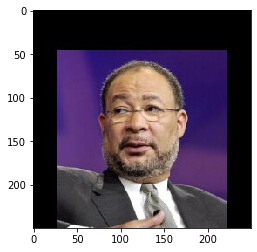

Hello Human! 
 If you were a dog, you would look like a  Dachshund


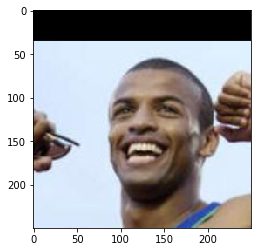

Hello Human! 
 If you were a dog, you would look like a  Boykin spaniel


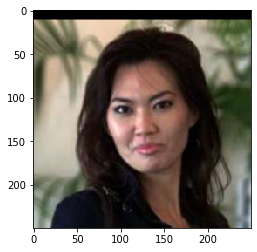

Its a dog! 
 And it looks like a  Mastiff


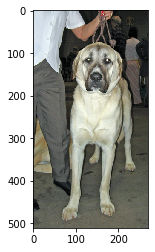

Its a dog! 
 And it looks like a  Anatolian shepherd dog


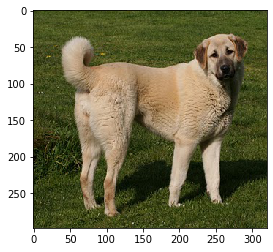

Its a dog! 
 And it looks like a  Anatolian shepherd dog


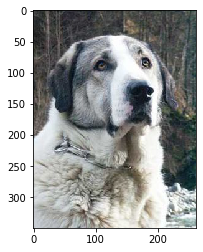

In [45]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)